# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display # Allows the use of display() for DataFrames
sns.set()
sns.set_context('notebook')

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [22,50,108]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31276,1917,4469,9408,2381,4334
1,6269,1095,1980,3860,609,2162
2,1531,8397,6981,247,2505,1236


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** *More below this answer*

The data of each entry does give insight as to what type of establishment it might represent.

- **Entry 22** makes purchases in the fresh, frozen, and delicatessen categories far above their respective averages. This could very well be a large grocery market focusing on fresher produce and food.

- **Entry 50** could be a smaller-scale grocer, perhaps in the local or neighborhood vein. Except for the frozen and delicatessen categories, most purchases are below the averages.

- **Entry 108** appears to be something like a coffee cafe. They purchase high amounts of milk and paper products with some smaller grocery and delicatessen purchases to provide cafe-type snacks or meals.

*The answers above were my original responses. I developed these by observing the minima, maxima, and means. While my observations were accurate, I realized these were not concrete enough or founded following some feedback in a review. I spent some time developing a visualization mapping the three points to their respective populations below.*

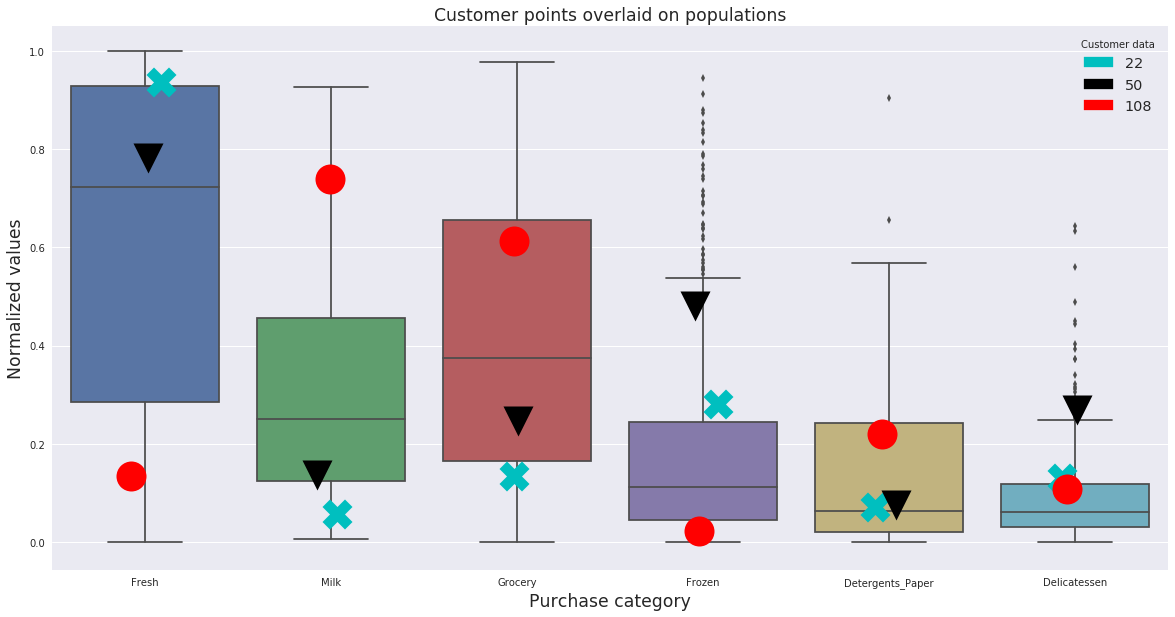

In [4]:
from sklearn.preprocessing import normalize
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize']=(20,10)
norm_data = normalize(data)
norm_samples = pd.DataFrame([norm_data[i] for i in indices], columns=samples.columns)
norm_data = pd.DataFrame(norm_data, columns=samples.columns)
mkg = ['X', 'v', 'o', '*']
clr = ['c', 'k', 'r', 'y']
patch_list = list()
for i, j in enumerate(indices):
    ax = sns.stripplot(data=norm_samples.iloc[[i]], marker=mkg[i], size=30, color=clr[i], jitter=True)
    patch_list.append(mpatches.Patch(color=clr[i], label=j))
ax1 = sns.boxplot(data=norm_data)
ax1.legend(handles=patch_list, title='Customer data', fontsize='x-large')
ax1.set_xlabel('Purchase category', size='xx-large'); ax1.set_ylabel('Normalized values', size='xx-large'); ax1.set_title('Customer points overlaid on populations', size='xx-large')

**Answer: **The visualization above provides a more concrete idea of *what* each entry in the data table is and how it stands in relation to all the others collected. In the legend, we can see the customer data points are identifiable by their colors and shapes overlaid on each boxplot. As a matter of covenience, every boxplot has been normalized by sklearn so we can visualize them on scale allowing us to make stronger conclusions about their markets.

22 - This customer sits on or outside the inner quartile range for every category barring 'detergents_paper'. In that category it seems very close to the mean. Being low in 'milk' and 'grocery', a fresh style market comes to mind. Fresh greens and fruit, frozen meats and fish, and delicacies signal that industry is likely.

50 - Customer 50 actually follows a similar trend to customer 20, and might not be as different as originally thought. It sits above the means in 'fresh', 'frozen', and 'delicatessen', just like customer 20. Its value is also near the mean on 'detergents_paper'. It has a significantly higher value in 'frozen' and is even an outlier in the 'delicatessen' category. These two characteristics indicate to me a specialty-foods grocer or seafood restaurant that might require freezing and labeling items as 'delicatessen'.

108 - The entry for customer 108 still suggests some type of cafe, as its highest values are in 'detergents_paper', 'delicatessen', 'milk', and 'grocery'. These could account for paper cups, foaming milk, and coffee-side snacks. Milk is particularly high, sitting near the maximum, supporting the notion of a coffee cafe. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Detergents_Paper', axis=1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, data[['Detergents_Paper']], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
for i in range(5):
    regressor = DecisionTreeRegressor().fit(X_train, y_train)
    print regressor.score(X_test, y_test)
    
# TODO: Report the score of the prediction using the testing set
# score = regressor.score(X_test, y_test)
# print score

0.47655183182
0.49796198634
0.426991399506
0.488906799623
0.499751701068


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** I selected the 'Detergents_Paper' for prediction. Using the model and its score method, I discovered the feature is not easy to predict, based on other provided information. With a score of $\approx$ 0.31 - 0.49, I believe it is a feature necessary for predicting spending habits, although some correlation is certainly present.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

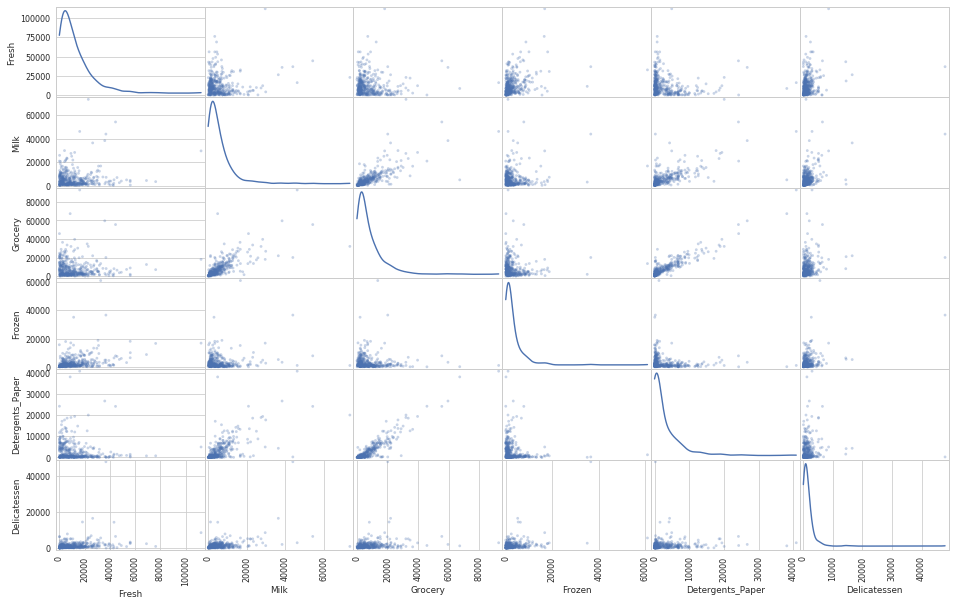

In [6]:
# Produce a scatter matrix for each pair of features in the data
sns.set(context='paper', style='whitegrid')
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (16,10), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:** There is no indication across the scatter matrix that normal distributions exist in this dataset. There are some strong positive correlations, for example between Detergents_Paper and Grocery. This is supported by the heatmap below. There also appears to be some natural log correlation between features where y is high when x is low, and vice versa, such as between Fresh or Frozen and Detergents_Paper. Although $\approx$ 0.34 - 0.48 didn't seem high, perhaps that is strong enough to be considered correlation.

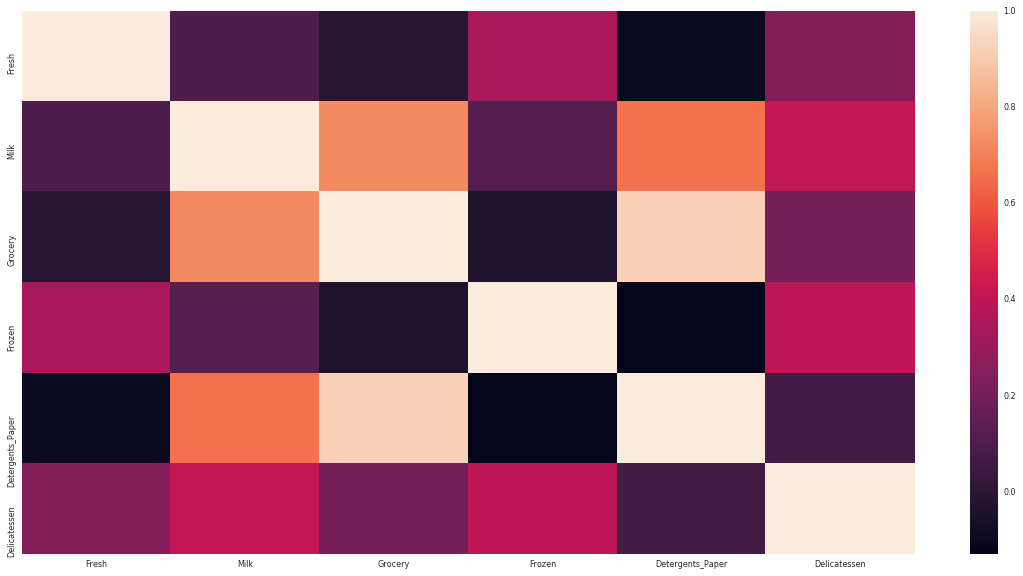

In [7]:
sns.heatmap(data.corr())

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

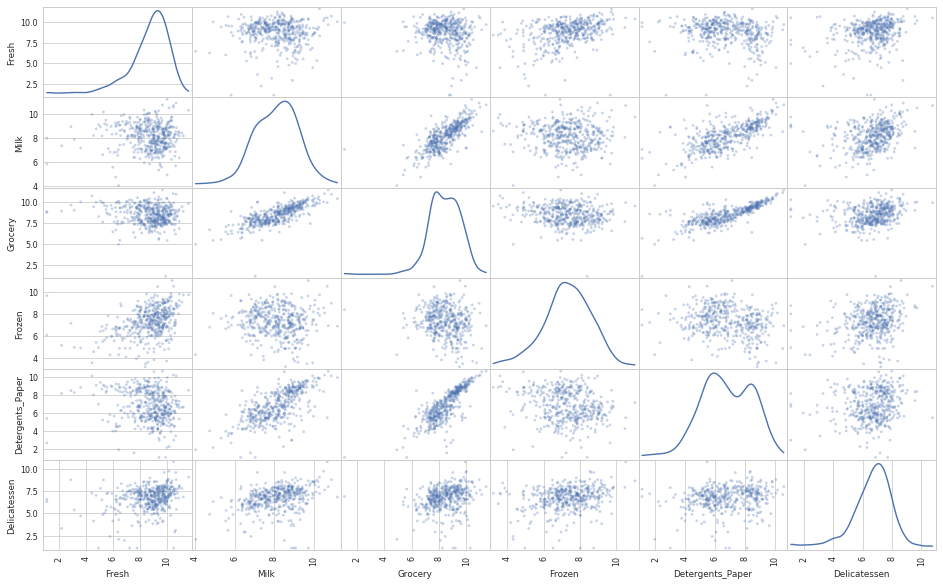

In [8]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (16,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.350606,7.558517,8.404920,9.149316,7.775276,8.374246
1,8.743372,6.998510,7.590852,8.258422,6.411818,7.678789
2,7.333676,9.035630,8.850947,5.509388,7.826044,7.119636


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
# Dictionary for later step
index_dict = dict()

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Add outliers by index to dictionary
    indexed = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    for row_num in indexed.index:
        try:
            index_dict[row_num] += 1
        except:
            index_dict[row_num] = 1
            
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
print "Rows with more than one outlier: {}".format([i for i in index_dict if index_dict[i] > 1])

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
122,9.410174,5.303305,5.501258,7.596392,3.218876,6.756932
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101
177,9.453992,8.899731,8.419139,7.468513,2.995732,7.875119
204,7.578657,6.792344,8.561401,7.232010,1.609438,7.191429
237,9.835851,8.252707,6.385194,8.441176,3.332205,7.102499
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
338,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


Rows with more than one outlier: [142, 154, 66, 289, 75, 338]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** I have created a dictionary to determine if any data points qualify as outliers in more than one category. Feedback from a review suggested there are five datapoints with multiple outlying categories; I am seeing six after using a dictionary and manually verifying. I am opting to keep them in the dataset, as I imagine outliers on the extreme end could be a market giant, for example a business like Amazon. It is difficult to imagine what outliers on the opposite end of the spectrum could be and their significance, but for consistency's sake I will keep those as well.

No outliers will be removed yet. I hope to evaluate the performance of the model with and without them.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

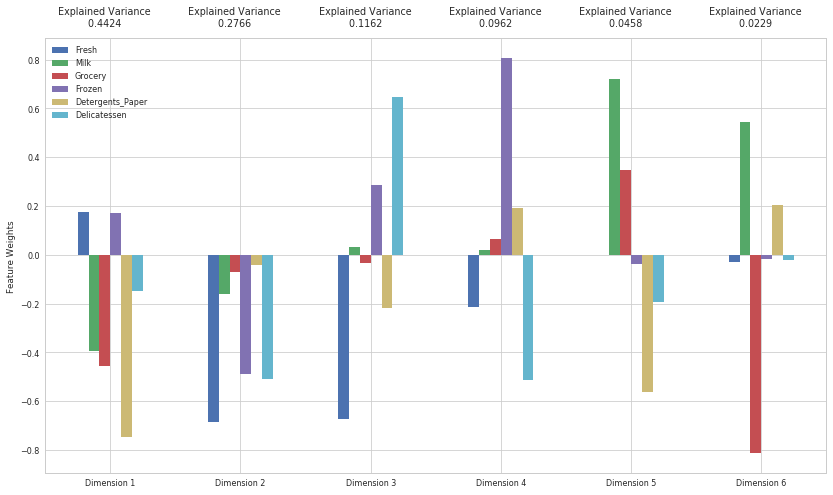

In [11]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.keys())).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** With a little help from Mr. Sebastian Raschka, I have recycled some Python code to fit our example in the visualization below.

The first and second principal component account for more than 71 percent of the data variance. The first four account for more than 93 percent.

The first component includes strong magnitudes for the features 'milk', 'grocery', and 'detergents_paper', suggesting these features often vary collectively. A degree of anti-correlation exists for this principal component in the 'fresh' and 'frozen' features. In layman's terms, we can say a large amount of information regarding our customers can be accounted for considering how much 'milk', 'grocery', and 'detergents_paper' they purchase and how much 'fresh' and 'frozen' they do not, or vice versa.

Every feature weight in PCA dimension two has magnitude in the same direction, with the strongest weights being 'fresh', 'delicatessen', and 'frozen'. To visualize it, we can imagine the variation of customer purchases in those specified categories and smaller purchases in the others provides the second most amount of variation. Furthermore, customer purchases with these ratios in addition to principal component one will provide more than 71 percent of the original information.

Dimension three shows that purchases in the 'delicatessen' and 'frozen' categories correlate inversely with 'fresh' and 'detergents_paper' at a value of about 0.11. This is similarly significant to the other principal components in showing us there is more variation in the data when purchases are made in one pair of categories and not in the other.

Likewise, the fourth dimension shows that purchases in the 'frozen' and 'detergents_papers' categories anti-correlate with 'fresh' and 'delicatessen'. The same logic can be applied here, claiming almost 0.1 variation when one pair is purchased and the other is not.

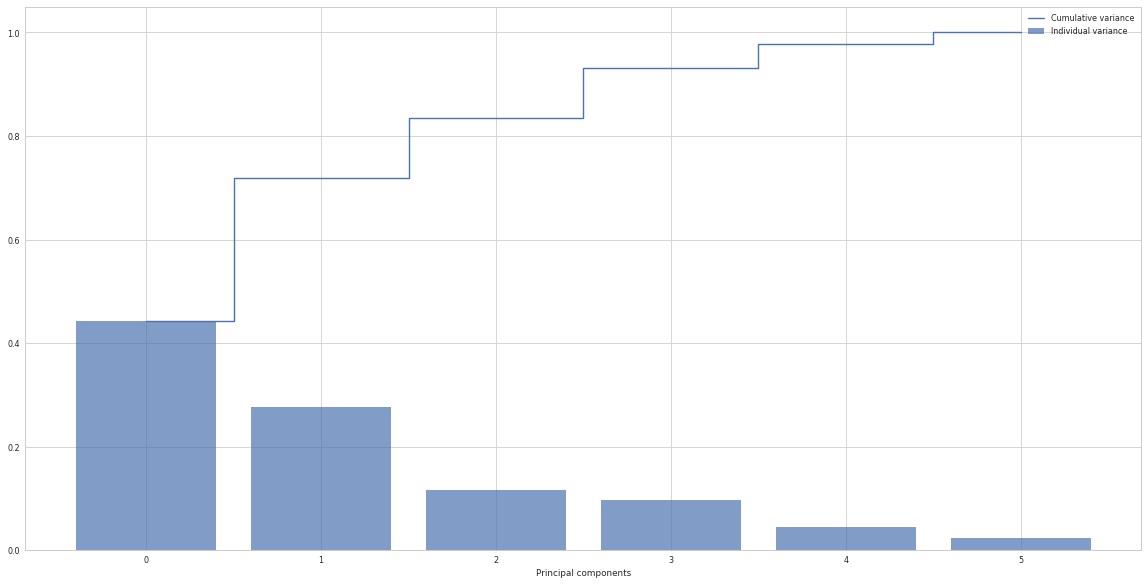

In [12]:
plt.bar(range(len(good_data.keys())), [i for i in pca.explained_variance_ratio_], alpha=0.7, label='Individual variance')
plt.step(range(len(good_data.keys())), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.1549,-2.8299,0.3035,0.4400,-1.3788,-0.1944
1,1.1236,-0.7352,0.9892,0.1014,-1.1285,-0.0335
2,-1.9415,1.3788,0.5135,-1.1374,0.1942,0.4355


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [14]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.1549,-2.8299
1,1.1236,-0.7352
2,-1.9415,1.3788


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

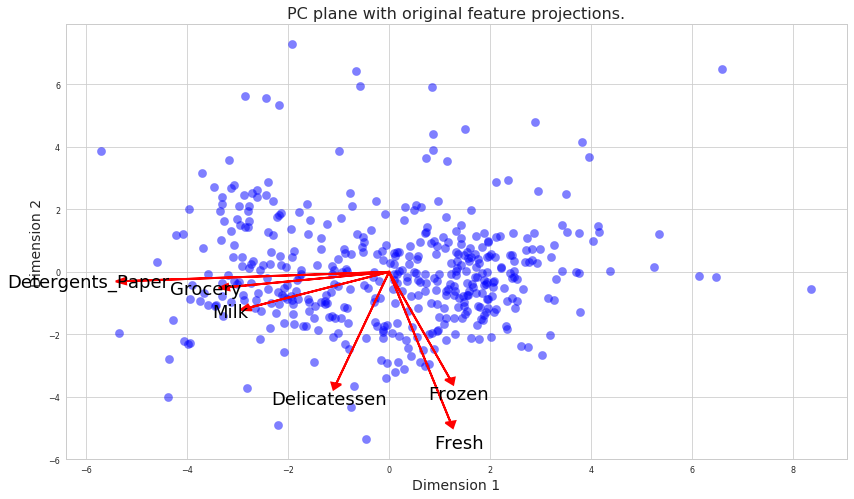

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:** Deciding which model to select will come down to their respective properties.

K-means does a good job of identifying spherical clusters, in some dimensional space. It decides what data points coincide to hard clusters. It sounds like we have to assign the number of clusters, as discussed in the lessons.

The Guassian Mixture Model give us a soft-clustering approach, assigning likelihoods of assignment. With this approach, we will be able to select the number of parameters with which to build, as opposed to the number of clusters. Given the insight our data analysis has provided thus far, this seems like a good idea.

As we do not have clear information about the categories of customers and understand PCA and our parameters somewhat, it might be a good idea to proceed with soft clustering and select Gaussian Mixture Method.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for i in range(1, 8):
    try:        
        # TODO: Apply your clustering algorithm of choice to the reduced data 
        clusterer = GaussianMixture(n_components=i).fit(reduced_data)

        # TODO: Predict the cluster for each data point
        preds = clusterer.predict(reduced_data)

        # TODO: Find the cluster centers
        centers = clusterer.means_

        # TODO: Predict the cluster for each transformed sample data point
        sample_preds = clusterer.predict(pca_samples)

        # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
        score = np.mean(silhouette_score(reduced_data, preds))
        print np.round(score, 4)
    except:
        print "Value {} was not accepted as an n_components parameter.".format(i)

Value 1 was not accepted as an n_components parameter.
0.4104
0.4184
0.3617
0.2962
0.3039
0.3261


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:** It appears that the higher the number of components selected, the more dissimilar the silhouette score returned is. It appears that using two or three (clusters or components now?) is the best choice. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

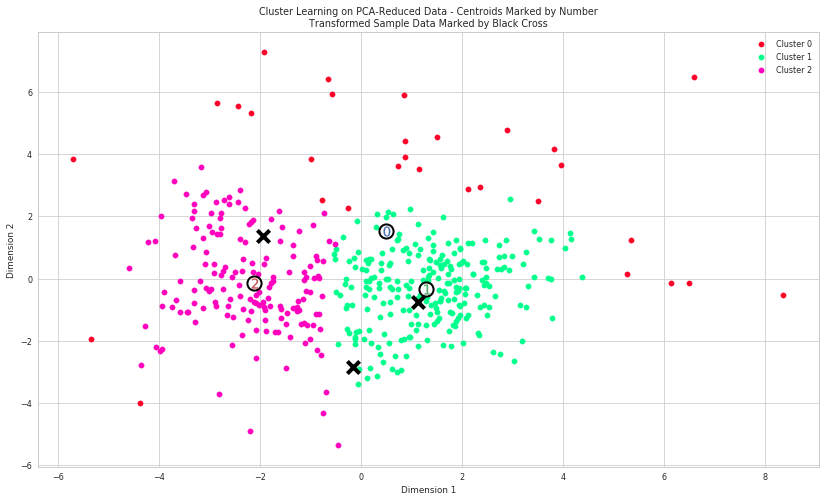

In [20]:
clusterer = GaussianMixture(n_components=3).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = np.mean(silhouette_score(reduced_data, preds))

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [22]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
true_centers = true_centers.append(pd.DataFrame(np.mean(data)).T)
true_centers = true_centers.rename(index={true_centers.index[-1]: 'Means'})
true_centers = true_centers.append(pd.DataFrame(data.median()).T)
true_centers = true_centers.rename(index={true_centers.index[-1]: 'Medians'})
true_centers = true_centers.append(pd.DataFrame(data.std()).T)
true_centers = true_centers.rename(index={true_centers.index[-1]: 'Standard Deviations'})
true_centers = true_centers.append(pd.DataFrame(data.max()).T)
true_centers = true_centers.rename(index={true_centers.index[-1]: 'Max'})
true_centers = true_centers.append(pd.DataFrame(data.min()).T)
true_centers = true_centers.rename(index={true_centers.index[-1]: 'Min'})
true_centers = true_centers.append(pd.DataFrame(data.max() - data.min()).T)
true_centers = true_centers.rename(index={true_centers.index[-1]: 'Ranges'})
display(np.round(true_centers))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,2343.0,2162.0,3339.0,760.0,578.0,333.0
Segment 1,9616.0,2139.0,2649.0,2159.0,346.0,762.0
Segment 2,4660.0,7942.0,12282.0,1092.0,4343.0,1149.0
Means,12000.0,5796.0,7951.0,3072.0,2881.0,1525.0
Medians,8504.0,3627.0,4756.0,1526.0,816.0,966.0
Standard Deviations,12647.0,7380.0,9503.0,4855.0,4768.0,2820.0
Max,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0
Min,3.0,55.0,3.0,25.0,3.0,3.0
Ranges,112148.0,73443.0,92777.0,60844.0,40824.0,47940.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:** Let's take a look at the segment statistics and compare them to the averages - it should give insight about segment classifications. For clarity, I have added the median, standard deviation, minimum, maximum, and range for each feature.

It is noteworthy that the means are higher than the medians by a factor of nearly 0.5 in all cases. For some features, the difference is extreme; the 'detergents_paper' mean triples the median.

Segment 0: This segment has an interesting trend. It exceeds the values of the other segments in no category. It is significantly distanced from the means and medians; the means are higher on the order of two to five times. This segment likely represents smaller purchasing companies, and there seem to be enough of them to define an entire segment.

Segment 1: This segment likely contains the largest 'fresh' and 'frozen' entries, as the clusters have the highest values in these categories when compared to other segments; both are less than the respective means by less than half of one standard deviation. 'Fresh' exceeds the median, while 'frozen' does not. It seems like they could be the giants in this arena, perhaps in the fresh market and produce industries.

Segment 2: Here we see very high 'milk', 'grocery', and 'detergents_paper' values when compared to the means and other segments. 'Milk' is neary four times the value of the other segments. 'Grocery' pulls nearly the same ratio. 'Detergents_paper' takes it a step farther and exceeds the others by a factor of seven. The impression is that this segment is for large grocer retailers, who sell mass quantities of 'grocery' items and household necessities in the 'detergents_paper' category, but might not process as many 'frozen' and 'fresh' purchases as a restaurant would.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [24]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
print "\n"
print samples
display(np.round(true_centers))

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 2


   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  31276  1917     4469    9408              2381          4334
1   6269  1095     1980    3860               609          2162
2   1531  8397     6981     247              2505          1236


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,2343.0,2162.0,3339.0,760.0,578.0,333.0
Segment 1,9616.0,2139.0,2649.0,2159.0,346.0,762.0
Segment 2,4660.0,7942.0,12282.0,1092.0,4343.0,1149.0
Means,12000.0,5796.0,7951.0,3072.0,2881.0,1525.0
Medians,8504.0,3627.0,4756.0,1526.0,816.0,966.0
Standard Deviations,12647.0,7380.0,9503.0,4855.0,4768.0,2820.0
Max,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0
Min,3.0,55.0,3.0,25.0,3.0,3.0
Ranges,112148.0,73443.0,92777.0,60844.0,40824.0,47940.0


**Answer:** When considering the analysis of segment statistics against our figures:

Sample 0 does not seem to fit into segment 0 with such a high 'fresh' value. Although its high 'delicatessen' value that is double the mean suggest segment 2 is a good fit, the high value of 'frozen' suggests segment 1 is indeed a good fit.

Sample 1 aligns with the segment 1 values well; the only value exceeding the segment value by more than a factor of two is the 'delicatessen' category. The segment 2 categories of 'milk', 'grocery', and 'detergents_paper' exceed sample 1 values by much higher orders. Once again, segment 0, reserved for smaller purchasing, is not a good fit.

Sample 2's 'fresh' and 'frozen' seem to aligh with segment 0 well at first glance, considering the relative difference between them is lower than the other segments. However, every single other category aligns more strongly with segment two. Using some math below, we can verify this.

In [32]:
for i in range(3):
    print "Difference divided by mean for segment {}".format(i)
    print abs(samples.iloc[2] - true_centers.iloc[i]) / true_centers.iloc[3]

Difference divided by mean for segment 0
Fresh               0.067665
Milk                1.075693
Grocery             0.458040
Frozen              0.166996
Detergents_Paper    0.668750
Delicatessen        0.592181
dtype: float64
Difference divided by mean for segment 1
Fresh               0.673733
Milk                1.079661
Grocery             0.544818
Frozen              0.622410
Detergents_Paper    0.749264
Delicatessen        0.310846
dtype: float64
Difference divided by mean for segment 2
Fresh               0.260744
Milk                0.078499
Grocery             0.666685
Frozen              0.275071
Detergents_Paper    0.637864
Delicatessen        0.057054
dtype: float64


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** Although the data does not include information about the frequency of deliveries, we can by virtue of purchase types and their volumes extrapolate some information for insight into how altering delivery schedules will in turn affect customer response. 

For customers who make heavy purchases that are perishable, a slimmer delivery schedule would not be an option. Conversely, customers who purchase heavily from the non-perishable categories will probably respond well; they do not require large amounts of items like milk, frozen items, or fresh food frequently. Bulkier but fewer shipments would be appealling, particularly if it included a price cut.

To verify *any* of this logic, the A/B test must rely on equally representing segments. This can be achieved by evenly distributing members of each identified segment into groups A and B. It is advised, however, to create a smaller test group and larger control group, in the event the new policy flops.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The engineered customer segments can be treated as a pseudo classification label. Evaluating anticipated purchases, perhaps from purchase history or expected sales, provides enough insight to use the trained unsupervised algorithm and predict within which segment new customers fall. 

It would likely involve the steps of cleaning up the customer data, normalizing it, and then applying a predict or predict_proba method to the trained model and the new data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

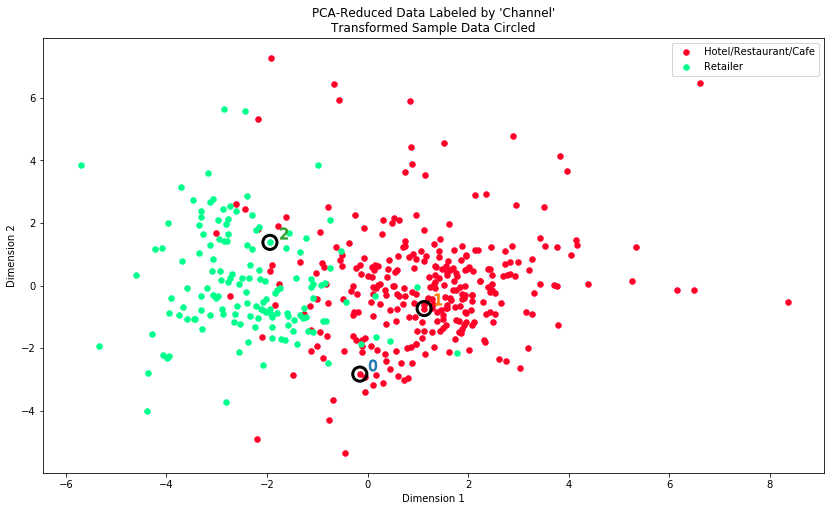

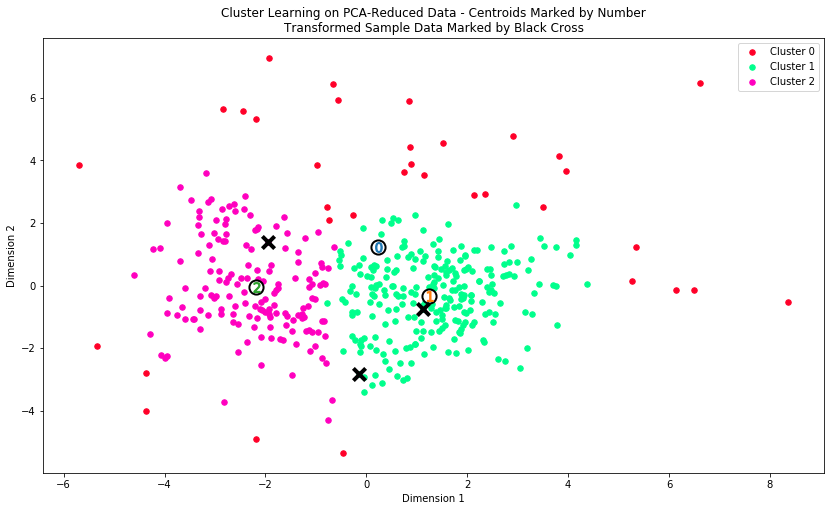

In [21]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:** Given this new information, our understanding of the data changes some, albeit not greatly.

Originally, we attempted clustering and unsupervised learning with three clusters (or components). It performed admirably, doing an efficient job of splitting the clusters in a very similar place. Perhaps by virtue of how unsupervised clustering performs, the overlap between clusters is almost non existent. The third group is visibly almost entirely compsed of a sparse ring around the population of the other two clusters.

As mentioned, a bit of overlap exists between the two clusters. I feel that this overlap is where some customers do not fall into a clear category of HoReCa or Retail, but elsewhere - the distinctions are quite clear. In other words, outside of this blending zone, customers are clearly in one category or the other. And quite beautifully, it's almost linearly separable - including those points outside the denser areas.

My original inclination did not take into account customers such as hotels. This group, although purchasing similarly to some other industries, is important to consider. Other than that missed information, I feel like my intuition was fairly accurate.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.